## Python Basic

In [1]:
a = 3
b = 2
a + b

5

In [2]:
b + 10

12

## Sina Crawler

In [12]:
import requests
res = requests.get('http://news.sina.com.cn/china/')
res.encoding = 'utf-8'
print(res.encoding)

utf-8


In [18]:
#print(res.text)
print(type(res))

<class 'requests.models.Response'>


## HSR Crawler

In [9]:
import requests
url = 'https://www.thsrc.com.tw/tw/TimeTable/SearchResult'
payload = {
'StartStation':'977abb69-413a-4ccf-a109-0272c24fd490',
  'EndStation':'3301e395-46b8-47aa-aa37-139e15708779',
  'SearchDate':'2016/11/03',
  'SearchTime':'11:00',
   'SearchWay':'DepartureInMandarin'    
}
res = requests.post(url, data = payload)
#print(res.text)

## TW Traffic

In [11]:
import requests
res = requests.get('http://twtraffic.tra.gov.tw/twrail/SearchResult.aspx?searchtype=0&searchdate=2016/11/03&fromstation=1810&tostation=1008&trainclass=%271100%27,%271101%27,%271102%27,%271107%27,%271108%27,%271110%27,%271120%27&fromtime=0600&totime=2359')
#print(res.text)

## BeautifulSoup Sample

In [17]:
from bs4 import BeautifulSoup 

html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
</html>
'''
soup = BeautifulSoup(html_sample, 'html.parser')
print(type(soup))
print(soup.text)

<class 'bs4.BeautifulSoup'>



Hello World
This is link1
This is link2





## Select by Tag

In [22]:
type(soup.select('a'))
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [25]:
type(soup.select('a')[0])
soup.select('a')[0]

<a class="link" href="#">This is link1</a>

In [28]:
soup.select('h1')[0]

<h1 id="title">Hello World</h1>

## Select by CSS ID

In [29]:
# id => #
soup.select('#title')[0]

<h1 id="title">Hello World</h1>

## Select by CSS Class

In [32]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

## Extract Attribute

In [36]:
for link in soup.select('body .link'):
    #print(link)
    #print(link.text)
    print(link['href'])

#
# link2


In [41]:
html_sample2 = '<a href="#" qoo=123 oop=456> haha</a>'
soup2 = BeautifulSoup(html_sample2, 'html.parser')
alink = soup2.select('a')[0]
print(alink['href'])

#


## Sina List Crawler

In [44]:
import requests

res = requests.get('http://news.sina.com.cn/china/')
res.encoding = 'utf-8'

#print(res.text)

In [46]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [ ]:
for news in soup.select('div.news-item'):
    print(news)
    print('============================================')

## 抓取2330

Populating the interactive namespace from numpy and matplotlib


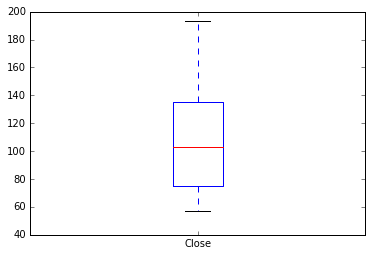

In [67]:
%pylab inline
import pandas.io.data as web
yahoo = web.DataReader('2330.TW', 'yahoo')
yahoo['Close'].plot(kind='box')

## 工人智慧破解法

In [ ]:
#__VIEWSTATE:/wEPDwUJOTAxMjkxMjg3D2QWAgIDD2QWBAIBD2QWAmYPZBYEZg9kFgJmDxAPFgYeB0NoZWNrZWRnHglGb3JlQ29sb3IKAB4EXyFTQgIEZGRkZAIBD2QWAgIBDw8WBB8BCgAfAgIEZGQCAw9kFgQCAw8PFgIeBFRleHRlZGQCCQ8PFgIeB1Zpc2libGVoZGQYAgUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgMFElJhZGlvQnV0dG9uX05vcm1hbAUQUmFkaW9CdXR0b25fRXhjZAUQUmFkaW9CdXR0b25fRXhjZAUPQ2FwdGNoYUNvbnRyb2wxDwUkYjBmYjVmMDktYzU1Zi00NTE2LWFlOTctZDFmMDJlMjIyYjM4ZN00Ely6mLH/JWc+QwHL7ew=
#__EVENTVALIDATION:/wEdAAY4aXdFJPfAQ6tOl77Hb2yLfMmuxAJNAJcNkRRsVeJwwqKURZav/+YrVMqaWE2hvMxJwK4Ohf3nRgXHkFhQen1PRSciNdPYWmINCrip1wqw01PJCA0uL9aE2sjICZqv6GoZE3XjiE/u9UbOI1RYuPml
#RadioButton_Normal:RadioButton_Normal
#TextBox_Stkno:2330
#CaptchaControl1:8FXKY
#btnOK:查詢

In [96]:
import requests
from bs4 import BeautifulSoup


payload = {
'RadioButton_Normal':'RadioButton_Normal',
'TextBox_Stkno':'2330',
'CaptchaControl1':'8FXKY',
'btnOK':'查詢'
}
# 註冊一個session 物件
rs = requests.session()

res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
soup = BeautifulSoup(res.text, 'html.parser')

# 填補 __VIEWSTATE, __EVENTVALIDATION
for item in soup.select('input[type=hidden]'):
    #print(item['name'], item['value'])
    payload[item['name']]  = item['value']


In [97]:
domain = 'http://bsr.twse.com.tw/bshtm/'
imageurl = domain + soup.select('img')[1]['src']

import shutil
res2 = rs.get(imageurl,stream=True)
with open('captcha.png', 'wb') as f:
    shutil.copyfileobj(res2.raw, f)

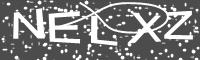

In [98]:
from PIL import Image
Image.open('captcha.png')

In [99]:
payload['CaptchaControl1'] = 'NELXZ'

In [101]:
res3 = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data = payload)
res4 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx')
#print(res4.text)

## 繞過Captcha 破解法

In [104]:
import requests
from bs4 import BeautifulSoup


payload = {
'RadioButton_Normal':'RadioButton_Normal',
'TextBox_Stkno':'3049',
'btnOK':'查詢'
}
# 註冊一個session 物件
rs = requests.session()

res = rs.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
soup = BeautifulSoup(res.text, 'html.parser')

# 填補 __VIEWSTATE, __EVENTVALIDATION
for item in soup.select('input[type=hidden]'):
    payload[item['name']]  = item['value']

res3 = rs.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data = payload)
res4 = rs.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx')
#print(res4.text)

In [122]:
with open('3049_5.csv', 'w') as f:
    f.write(res4.text)

In [120]:
import pandas
df = pandas.read_csv('3049_3.csv',encoding='UTF-8')
#df.head()